In [12]:
import pandas as pd
import numpy as np
import math,copy,os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from pathlib import Path
from Measure import measure_final_score
import statistics
from CatEncoder import *
import glob
import pickle

In [13]:

def get_results(path_name):
    path = r'/Users/germainherbay/PycharmProjects/Blind/adult/score/directed/sex_rel_hpw_recover/'+path_name+'/' # use your path
    all_files = glob.glob(path + "/*.csv")
    first_df = pd.read_csv(all_files[0])
    first_df['name'] = Path(all_files[0]).name
    first_df['Gender & Rel. & Hpw & Income redistribution'] = str(int(path_name) * 10)+"%"
    #first_df['operator'] = path_name
    for filename in all_files[1:]:
        df = pd.read_csv(filename)
        df['name'] = Path(filename).name
        df['Gender & Rel. & Hpw & Income redistribution'] = str(int(path_name) * 10)+"%"
        #df['operator'] = path_name
        first_df = first_df.append(df)
    first_df['model'] = first_df['model'].replace(['LogisticRegression()','RandomForestClassifier()', 'SVC()', 'MLPClassifier()'],['LR','RF','SVC', 'MLPC'])
    first_df.rename(columns = {'protected_att':'PA'}, inplace = True)
    return first_df

operators = ['1', '2', '3', '4', '5', '6', '7', '8',
             '9', '10']

def get_all_results(operators, PA):
    df_1 = get_results(operators[0])
    df_1 = df_1[df_1["PA"] == PA]
    for operator in operators[1:]:
        df = get_results(operator)
        df = df[df["PA"] == PA]
        df_1 = df_1.append(df)
    return df_1

df = get_all_results(operators, 'sex')
df=df.reset_index()
print(df.head())

   index   PA model  recall  accuracy  precision   eod   SPD  \
0      0  sex    LR    0.56      0.84       0.72  0.23  0.21   
1      1  sex    RF    0.59      0.83       0.70  0.08  0.18   
2      2  sex   SVC    0.56      0.85       0.76  0.13  0.18   
3      3  sex  MLPC    0.62      0.85       0.73  0.12  0.20   
4      0  sex    LR    0.56      0.84       0.72  0.23  0.21   

                         name Gender & Rel. & Hpw & Income redistribution  
0  sex_rel_hpw_recover1_4.csv                                         10%  
1  sex_rel_hpw_recover1_4.csv                                         10%  
2  sex_rel_hpw_recover1_4.csv                                         10%  
3  sex_rel_hpw_recover1_4.csv                                         10%  
4  sex_rel_hpw_recover1_5.csv                                         10%  


<AxesSubplot:xlabel='Gender & Rel. & Hpw & Income redistribution', ylabel='SPD'>

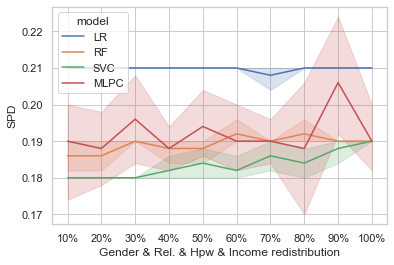

In [14]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Gender & Rel. & Hpw & Income redistribution", y="SPD", hue="model")

<AxesSubplot:xlabel='Gender & Rel. & Hpw & Income redistribution', ylabel='eod'>

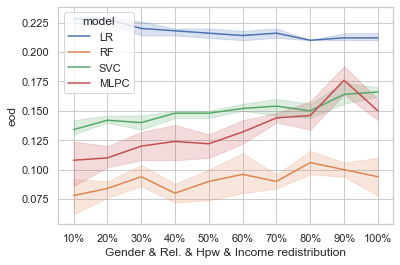

In [15]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Gender & Rel. & Hpw & Income redistribution", y="eod", hue="model")


<AxesSubplot:xlabel='Gender & Rel. & Hpw & Income redistribution', ylabel='recall'>

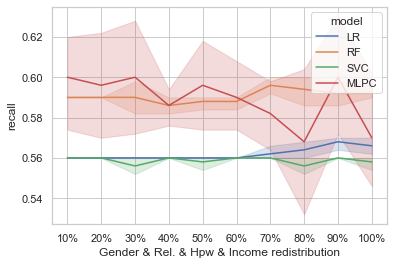

In [16]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Gender & Rel. & Hpw & Income redistribution", y="recall", hue="model")

<AxesSubplot:xlabel='Gender & Rel. & Hpw & Income redistribution', ylabel='accuracy'>

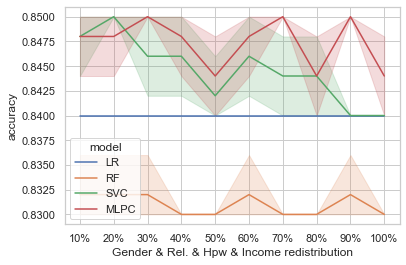

In [17]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Gender & Rel. & Hpw & Income redistribution", y="accuracy", hue="model")

<AxesSubplot:xlabel='Gender & Rel. & Hpw & Income redistribution', ylabel='precision'>

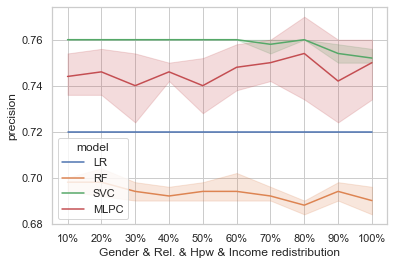

In [18]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Gender & Rel. & Hpw & Income redistribution", y="precision", hue="model")
